<font size=6><b>Home assignment2 - Difference equations</b></font><br/>
<font size=5>October 2020</b><br/>
<font size=3>Barbora Jakubová<br/>



# Problem 1

Find complete solution (without any software) of these difference equations and discuss stability of equilibrium:

<font color=blue><b>1) $2y_{n+1}+0.6y_n=13$</b></font>

Homogenous equation: $2y_{n+1}+0.6y_n=0$
   
Fundamental system: 

$2\lambda + 0.6 = 0$ $\Rightarrow$ $ \lambda=-0.3$ $\Rightarrow$ FS:$\{(-0.3)^n\}$

Homogenous solution: $y_h= C\cdot (-0.3)^n$, $n\in \mathbb{N}, C \in\mathbb{R} $

Particular solution:

$13=A$ $\Rightarrow$ $2A+0.6A=13$ $\Rightarrow$ $2.6A=13$ $\Rightarrow$ $A=\frac{130}{26}=\frac{65}{13}=5$

<font color=blue><b>Solution:</b></font> $y_n=C\cdot (-0.3)^n + \frac{65}{13}$, $n\in \mathbb{N}, C \in\mathbb{R}$

Verification: 

LHS: $$2y_{n+1}+0.6y_n=
2 \cdot (C \cdot (-0.3)^{n+1} + \frac{65}{13})+0.6\cdot C\cdot (-0.3)^n + \frac{65}{13} =$$

$$=2\cdot C (-0.3)^n \cdot (-0.3) + 2\cdot \frac{65}{13} + 0.6\cdot C (-0.3)^n + 0.6\cdot \frac{65}{13}=$$

$$=\frac{130}{13}+\frac{6}{10}\cdot\frac{65}{13} = 10+3=13$$

RHS: 13  $\Rightarrow$ LHS=RHS

<font color=blue><b>Stability of equilibrium:</b></font> Root: $a=(-0.3)$ $\Rightarrow |a|<1$ which means that the equilibrium is **attractor** and the solution converges to 0. Moreover, $a<0$ which means **oscillatory behavour**.

<font color=blue><b>2) $2y_{n+2}-6y_{n+1}+5y_n=1$</b></font>

Fundamental system: 

$2\lambda^2 - 6\lambda + 5 = 0$ $\Rightarrow$ $ \lambda_{1,2}=\frac{6 \pm \sqrt{(36-40)}}{4}=\frac{6\pm \sqrt{-4}}{4}=\frac{6\pm 2i}{4}=\frac{3\pm i}{2}$

Since characteristical polynom has complex conjugate root, from our cook book we can rewrite
$\lambda_{1,2}=\alpha \pm \beta \cdot i$ to our case: $ \lambda_{1,2}=\frac{3\pm i}{2}$.

$\Rightarrow \alpha=\frac{3}{2}$ and $\beta=\frac{1}{2}$

Then, goniometric representation will look as follows: 
$$(\alpha \pm \beta i)^t=R^t(cos (\theta t) \pm sin(\theta t)), $$ where
    $R=\sqrt{\alpha^2+\beta^2}=\sqrt{\frac{9}{4}+\frac{1}{4}}=\sqrt{\frac{10}{4}}=\frac{\sqrt{10}}{2}$ 
    
and $tan(\theta)=\frac{\beta}{\alpha}=\frac{\frac{1}{2}}{\frac{3}{2}}=\frac{1}{3}=tan(\theta)$ $\Rightarrow$ $\theta = arctg(\frac{1}{3}) \sim 18.4° \sim 0.102 \pi$

Note: I calculated approximate values, but I will use the arctg() form since I think it looks better. 

Homogenous solution: $y_h=C_1 \cdot \Big(\frac{\sqrt {10}}{2}\Big)^n\cdot cos(arctg(\frac{1}{3})+ C_2\cdot \Big(\frac{\sqrt {10}}{2}\Big)^n\cdot sin (arctg(\frac{1}{3})$, $n\in \mathbb{N}, C_1,C_2\in\mathbb{R} $



Particular solution:

$1=A$ $\Rightarrow$ $2A-6A+5A=1$ $\Rightarrow$ $A=1$ 

<font color=blue><b>Solution:</b></font> $y_n=C_1 \cdot \Big(\frac{\sqrt {10}}{2}\Big)^n\cdot cos(arctg(\frac{1}{3}))+ C_2\cdot \Big(\frac{\sqrt {10}}{2}\Big)^n\cdot sin (arctg(\frac{1}{3}))+1$, $n\in \mathbb{N}, C_1,C_2 \in\mathbb{R} $


<font color=blue><b>Stability of equilibrium:</b></font> 


---
# Problem1 : Mathematically

---

In [1]:
import inspect
import pandas as pd
import sympy as sp
import numpy as numpy

import matplotlib.pyplot as plt
import math 

sp.init_printing()

In [2]:
t = sp.Symbol('t', integer = True)
c = sp.Symbol('c', integer = True)
y = sp.Function('y')
p=sp.Symbol("p")
yeq = sp.Eq(2*y(t+2) - 6*y(t+1) + 5*y(t), 1)
yeq

sp.rsolve(yeq, (y(t)))
q=sp.Eq(2* p**2-6*p+5, 0)
sp.solve(q,p)
sp.rsolve(yeq,y(t))

#2*(c*(10**(1/2)/2)**(t+2)*math.cos(numpy.arctan((1/3)*(t+2))))-6*(c*(10**(1/2)/2)**(t+1)*math.cos(numpy.arctan((1/3)*(t+1))))+5**(c*(10**(1/2)/2)**(t)*math.cos(numpy.arctan((1/3)*(t))))

# Problem2 : Cobbweb model

In [3]:
t = sp.Symbol('t', integer = True)
y = sp.Function('y')
cobb = sp.Eq(y(t+1), 3/0.4 - 3/4*y(t)) 
cobb

In [4]:
# the gift
def path(fun, start, iter): 
    x = numpy.zeros(2*iter+1)  #two points (two iterations)
    y = numpy.zeros(2*iter+1)
    x[0] = start
    y[0] = 0
    i = 1
    while i < 2*iter:
        x[i] = x[i-1]
        y[i] = fun(x[i])
        x[i+1] = y[i]
        y[i+1] = y[i]
        i += 2
    u = numpy.zeros(len(x)-1)
    v = numpy.zeros(len(y)-1)
    for i in range(len(x)-1):
        u[i] = x[i+1] - x[i]
        v[i] = y[i+1] - y[i]
    return(x, y, u, v)


In [5]:
# prepare a python function
recF = sp.lambdify(y(t), cobb.rhs, "numpy")
display(
    cobb,
    inspect.findsource(recF)
    )

(['def _lambdifygenerated(_Dummy_174):\n',
  '    return (7.5 - 0.75*_Dummy_174)\n'],
 0)

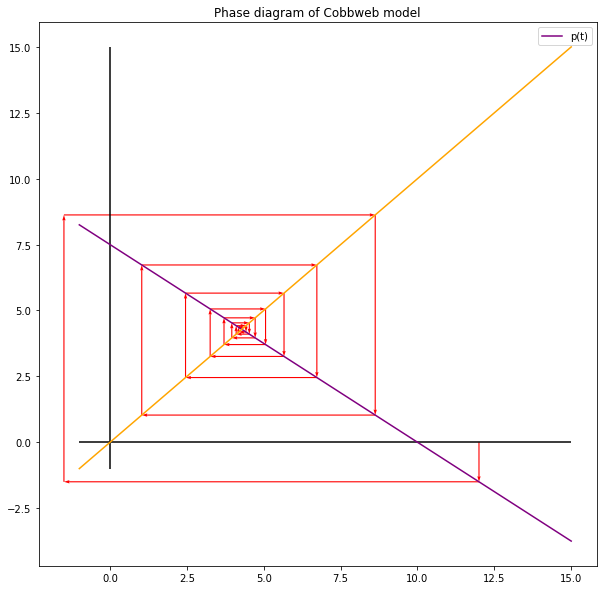

In [6]:
tval = numpy.linspace(-1, 15, 5)
x, y, u, v = path(recF, 12, 16)

plt.figure(figsize=(10,10))
plt.plot(tval, recF(tval),color="purple",label="p(t)")
plt.plot(tval, tval, color = 'orange')
plt.vlines(0, -1, 15, color = 'black')
plt.hlines(0, -1, 15, color = 'black')
plt.legend()
plt.title("Phase diagram of Cobbweb model")
plt.quiver(x[:-1],y[:-1], u, v,  angles='xy', scale_units='xy', scale=1, width = 0.002, color = 'red')

In [7]:
Qd = sp.Symbol('Q_d')                # quantity demanded
Qs = sp.Symbol('Q_s')                # quantity supplied 
t = sp.Symbol('t', integer = True)   # time
p = sp.Function('p')                   # price
a = sp.Symbol('a')                   # quantity demanded at zero price
b = sp.Symbol('b')                   # price sensitivity of demand (D slope)
c = sp.Symbol('c')                   # quantity supplied at zero price
d = sp.Symbol('d')                   # price sensitivity of supply (S slope)

In [8]:
demand = sp.Eq(Qd, a - b*p(t))
supply = sp.Eq(Qs, c + d*p(t-1))
display(demand, supply)

In [9]:
a=5
b=0.4
c=2
d=0.3
demand = sp.Eq(Qd, a - b*p(t))
supply = sp.Eq(Qs, c + d*p(t-1))
cobb=sp.Eq(a - b*p(t), c + d*p(t-1))
display(demand, supply)

In [10]:
sp.rsolve(cobb,p(t))

# Solow model

In [11]:
import sympy as sp

kt = sp.Function('k') 
k=sp.Symbol("k") # quantity demanded
s = sp.Symbol('s')                # quantity supplied 
t = sp.Symbol('t', integer = True)   # time
a=sp.Symbol("a")
A=sp.Symbol("A") # price
n = sp.Symbol('n')                   # quantity demanded at zero price
d = sp.Symbol('d')                   # price sensitivity of demand (D slope)
                  # price sensitivity of supply (S slope)

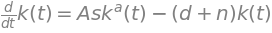

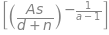

In [12]:
solow = sp.Eq(kt(t).diff(), s*A*kt(t)**a - (n+d)*kt(t))
display(solow)
steady= sp.Eq(0, s*A*kt(t)**a - (n+d)*kt(t))
display(sp.solve(steady,kt(t)))

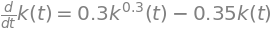

In [13]:
A=3
a=0.3
s=0.1
d=0.25
n=0.1
solow = sp.Eq(kt(t).diff(), s*A*kt(t)**a - (n+d)*kt(t))
steady= sp.Eq(0, s*A*kt(t)**a - (n+d)*kt(t))
display(solow)
display(sp.solve(steady,kt(t)))

In [14]:
import inspect

import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import ipywidgets as widgets
from ipywidgets import FloatSlider
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sp.init_printing()

In [16]:
t = sp.Symbol('t', integer = True)
k = sp.Function('k')
def fs(val, min, max, step):
    return FloatSlider(value=val, min=min, max=max, step=step, continuous_update = False)
@interact
def sinewaves (s=fs(0.1,0,1,0.01),A=fs(3,1,15,0.01), a=fs(0.3,0,1,0.01), n=fs(0.1,0,1,0.01),d=fs(0.25,0,1,0.01)):
    rec = sp.Eq(k(t).diff(), s*A*k(t)**a - (n+d)*k(t))
    recF = sp.lambdify(k(t), rec.rhs, "numpy")
    steady= sp.Eq(0, s*A*k(t)**a - (n+d)*k(t))
    kstar=numpy.array(sp.solve(steady,k(t)))
    a=kstar[1]
    display(
    rec,
    #inspect.findsource(recF)
    )
    tval = np.linspace(0,4,2000)
    plt.figure(figsize=(5,5))
    plt.plot(tval, recF(tval),color="purple",label="kdot(t)")
    plt.scatter(kstar[1],0,label="k*")
    plt.legend()
    plt.vlines(0,-1,2, color = 'black')
    plt.hlines(0,-1,kstar[1]+1, color = 'black')
    return plt.figure()



interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='s', max=1.0, step=0.01), Fl…

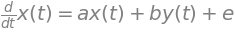

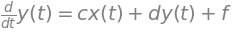

In [18]:
t = sp.symbols('t', real=True)

x = sp.Function('x')(t)
y = sp.Function('y')(t)

a = sp.symbols('a')
b = sp.symbols('b')
c = sp.symbols('c')
d = sp.symbols('d')
e = sp.symbols('e')
f = sp.symbols('f')

eq1 = sp.Eq(x.diff(t), a*x + b*y + e)
eq2 = sp.Eq(y.diff(t), c*x + d*y + f)

display(eq1, eq2)

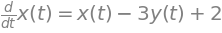

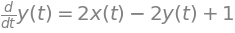

In [19]:
#### We can simply substitute the specific values into this system.

eq1s = eq1.subs([(a,1),(b,-3),(e,2)])
eq2s = eq2.subs([(c,2),(d,-2),(f,1)])

display(eq1s, eq2s)

#### Sympy makes solving these equations trivial. 

sol = sp.dsolve([eq1s, eq2s],[x, y])
sol

---
# Qualitative solutions
---

#### Start by finding the equilibrium lines, by solving the RHS of both equations in the system with respect to y.  
We get two specifications of a line in the form: $y(t) = a * x(t) + b$, we need only the RHS.

In [23]:
x0 = sp.solve(sp.Eq(eq1s.rhs), y)[0]
y0 = sp.solve(sp.Eq(eq2s.rhs), y)[0]

display(x0, y0)

C:\ProgramData\Anaconda32\lib\site-packages\sympy\core\relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


In [24]:
x_eq = sp.solve(sp.Eq(x0, y0), x)[0]
y_eq = y0.subs(x, x_eq)

display(x_eq, y_eq)

In [25]:
eigens = sp.Matrix([
    sp.Poly(eq1s.rhs).coeffs()[:2],
    sp.Poly(eq2s.rhs).coeffs()[:2]
]).eigenvects()

eigens

⎡⎛                ⎡⎡    3    ⎤⎤⎞  ⎛                ⎡⎡    3    ⎤⎤⎞⎤
⎢⎜                ⎢⎢─────────⎥⎥⎟  ⎜                ⎢⎢─────────⎥⎥⎟⎥
⎢⎜  1   √15⋅ⅈ     ⎢⎢3   √15⋅ⅈ⎥⎥⎟  ⎜  1   √15⋅ⅈ     ⎢⎢3   √15⋅ⅈ⎥⎥⎟⎥
⎢⎜- ─ - ─────, 1, ⎢⎢─ + ─────⎥⎥⎟, ⎜- ─ + ─────, 1, ⎢⎢─ - ─────⎥⎥⎟⎥
⎢⎜  2     2       ⎢⎢2     2  ⎥⎥⎟  ⎜  2     2       ⎢⎢2     2  ⎥⎥⎟⎥
⎢⎜                ⎢⎢         ⎥⎥⎟  ⎜                ⎢⎢         ⎥⎥⎟⎥
⎣⎝                ⎣⎣    1    ⎦⎦⎠  ⎝                ⎣⎣    1    ⎦⎦⎠⎦

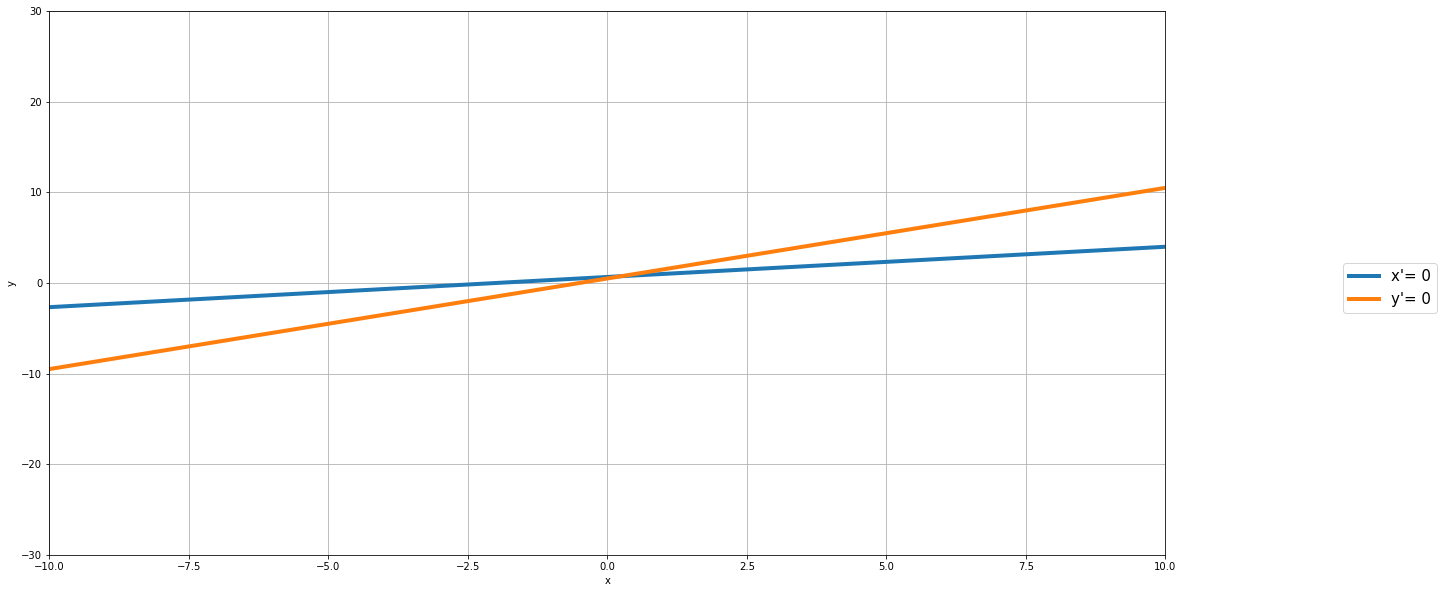

In [26]:
#### So, what do we have so far?

xsize = 25                                        # number of points on x axis
ysize = 25                                        # number of points on y axis
x_vals = np.linspace(-10, 10, xsize)              # prepare the x-values
y_vals = np.linspace(-30, 30, ysize)              # prepare the y-values

xeq = sp.lambdify(x, x0)
yeq = sp.lambdify(x, y0)
x0_vals = [xeq(i) for i in x_vals]                # equilibrium line x' = 0
y0_vals = [yeq(i) for i in x_vals]                # equilibrium line y' = 0

#eigen_1 = x_vals * (-1) * eigens[0][2][0][0].evalf() + y_eq
#eigen_2 = x_vals * (-1) * eigens[1][2][0][0].evalf() + y_eq

fig = plt.figure(figsize=(20,10))
plt.grid()                                                       # prepare a grid 

plt.xlim(-10, 10)
plt.ylim(-30, 30)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_vals, x0_vals, linewidth = 4, label = "x'= 0")      # equilibrium lines 
plt.plot(x_vals, y0_vals, linewidth = 4, label = "y'= 0")

#plt.plot(x_vals + x_eq, eigen_1, linestyle = '--', label = "eig 1")
#plt.plot(x_vals + x_eq, eigen_2, linestyle = '--', label = "eig 2")

plt.legend(bbox_to_anchor=(1.25, 0.55), prop={'size': 15})        # add legend, outside of the plot

#### With these lines, we can have a look into the specific regions of the plot to prepare example particular solutions.

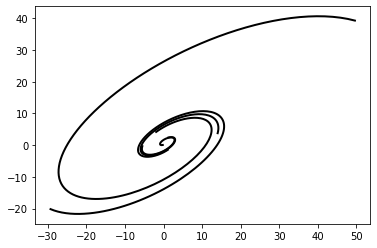

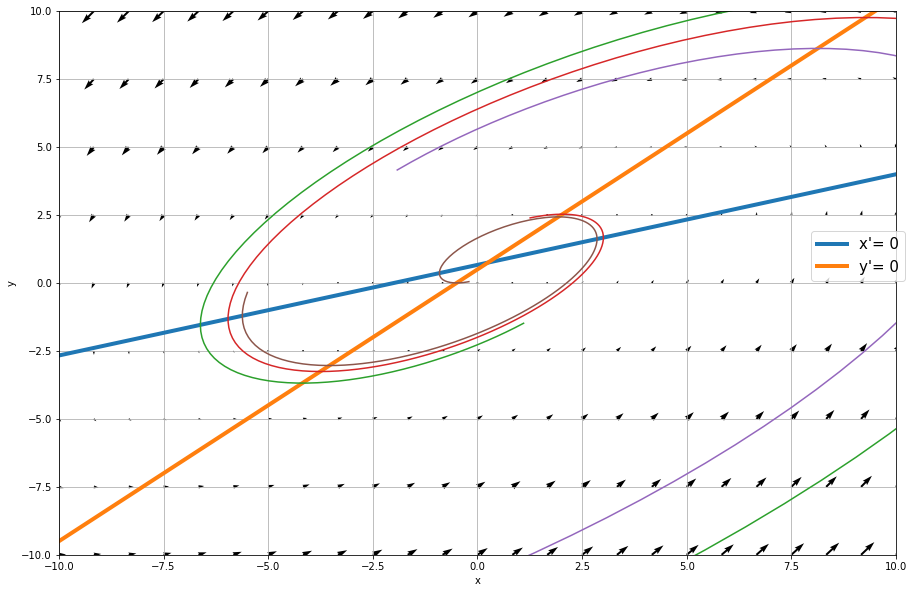

In [31]:
# NEW CODE BELLOW:
xyp = [particular(sol, i[0], i[1]) for i in [(6,10),(-5,-3),(-8,-15),(2.5,2.3)]]
_ = [plt.plot(i[0], i[1], linewidth = 2, color = 'black') for i in xyp]

def vector_field(xfun, yfun, xvals, yvals):
    gridsize = len(xvals) * len(yvals)            # the grid [x,y]
    xa_vals = np.zeros(gridsize)                  # arrow position x
    ya_vals = np.zeros(gridsize)                  # arrow position y
    dxa = np.zeros(gridsize)                      # arrow direction x
    dya = np.zeros(gridsize)                      # arrow direction y
    
    p = 0
    for i in xvals:                               # for every x value
        for j in yvals:                           # for every x & y value
            xa_vals[p] = i                        # save the combination
            ya_vals[p] = j
            dxa[p] = xfun(i, j)                   # calculate both derivatives
            dya[p] = yfun(i, j)
            p += 1                                # increment the position
    
    return(xa_vals, ya_vals, dxa, dya)

fig = plt.figure(figsize=(15, 10))
plt.grid()

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_vals, x0_vals, linewidth = 4, label = "x'= 0")      # equilibrium lines 
plt.plot(x_vals, y0_vals, linewidth = 4, label = "y'= 0")


plt.legend(bbox_to_anchor=(1.02, 0.55), prop={'size': 15})     # add legend, outside of the plot

_ = [plt.plot(i[0],i[1]) for i in xyp]

# NEW CODE BELLOW:
xfun = sp.lambdify((x,y), eq1s.rhs) 
yfun = sp.lambdify((x,y), eq2s.rhs)

xa, ya, dxa, dya = vector_field(xfun, yfun, x_vals, y_vals)
plt.quiver(xa, ya, dxa, dya)                                   # add the arrows